https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-ocean-wave-timeseries?tab=overview

In [1]:
import os
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/Users/lb962/Downloads/ESL/GESLA/')
from src.dataload.dataloader import load_datasets, store_datasets_in_globals
from src.visualisation.plot_variables import plot_variable_at_time, plot_variable_at_box
import cartopy.crs as ccrs

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# Run these lines of code to open and store the wave datasets
def store_wave_datasets_in_globals(folder_path):
    # Load datasets from the specified folder path
    datasets = load_datasets(folder_path)
    
    # Store datasets in the global scope
    for variable_name, dataset in datasets.items():
        # Create a variable with the same name as the variable_name and assign the dataset to it
        globals()[variable_name + '_dataset'] = dataset

folder_path = "/Users/lb962/Downloads/ESL/GESLA/data/ERA5waves"
store_wave_datasets_in_globals(folder_path)

## Wave variables
- mwd = mean wave direction
- wdw = wave spectral dimensional width
- pp1d = peak period
- mp = mean wave period
- significant wave height

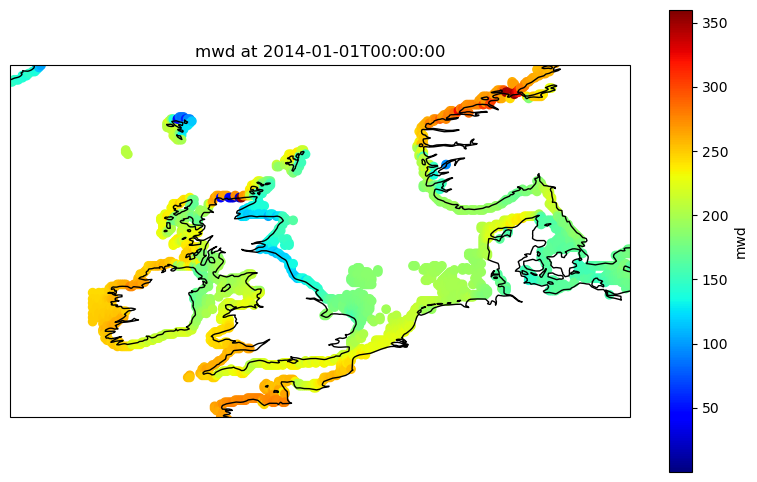

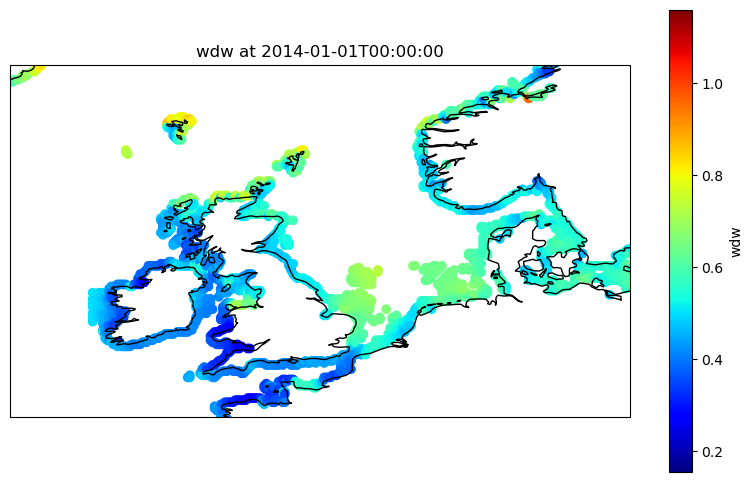

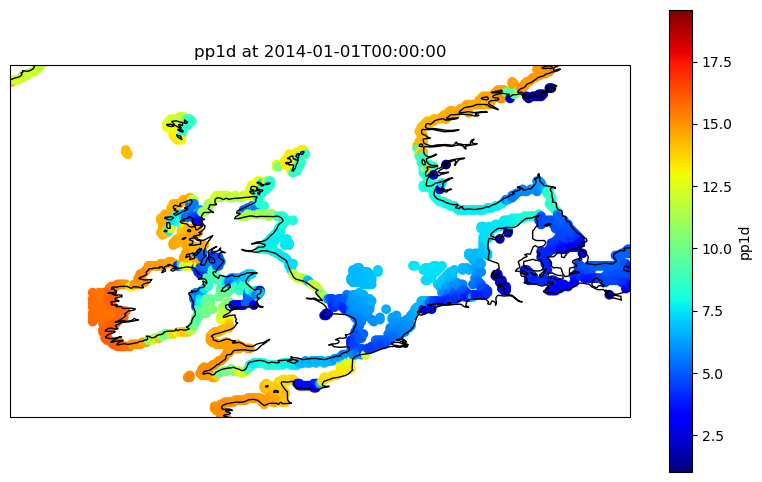

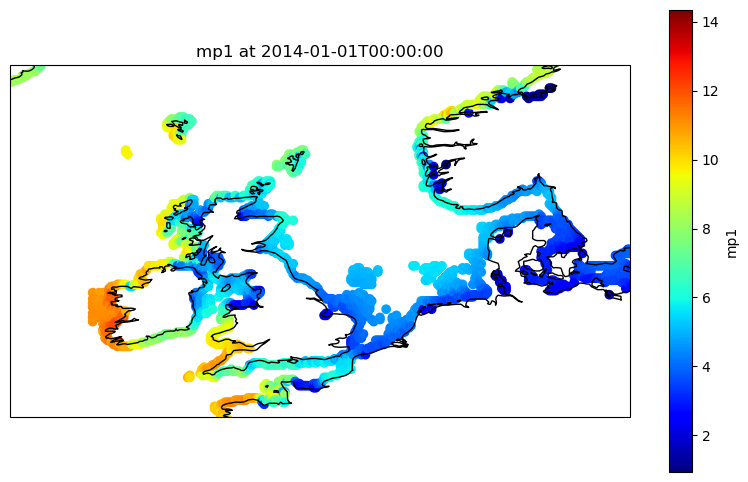

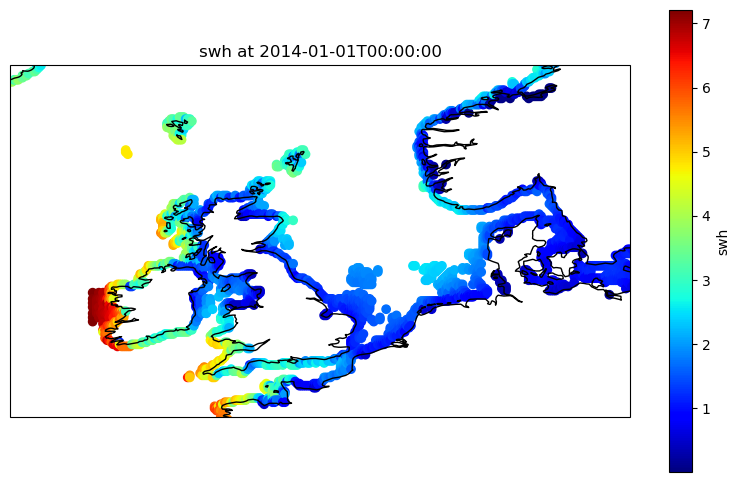

In [3]:
specific_time = '2014-01-01T00:00:00'  # Example: January 1st, 2014, 12:00 PM
# List out the names of the datasets
dataset_names = [name for name in globals() if name.endswith('_dataset')]

for dataset_name in dataset_names:
    # Check if the dataset name exists in globals
    dataset = globals().get(dataset_name)
    
    # Extract variable name from the dataset name
    variable = dataset_name.split('_')[0]

    # Call the plot_variable_at_time function
    if dataset:
        plot_variable_at_box(dataset, variable, specific_time)
    else:
        print(f"Dataset {dataset_name} not found in globals.")


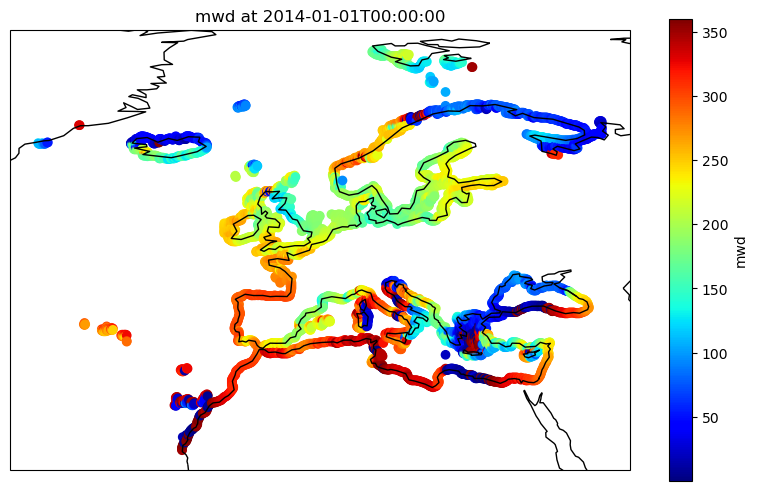

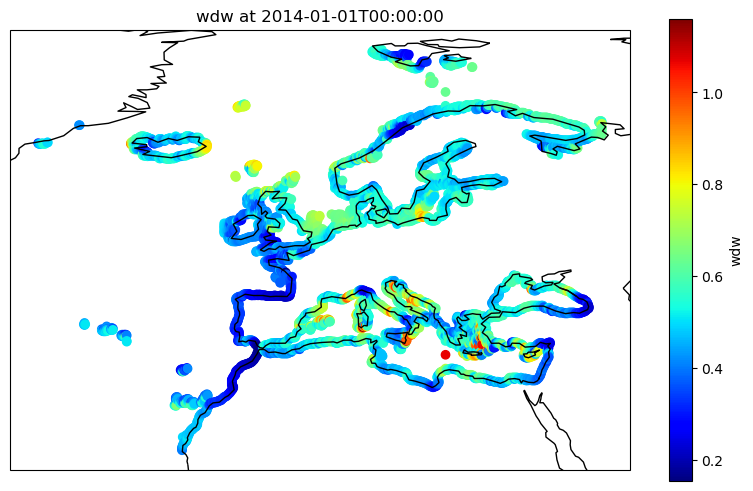

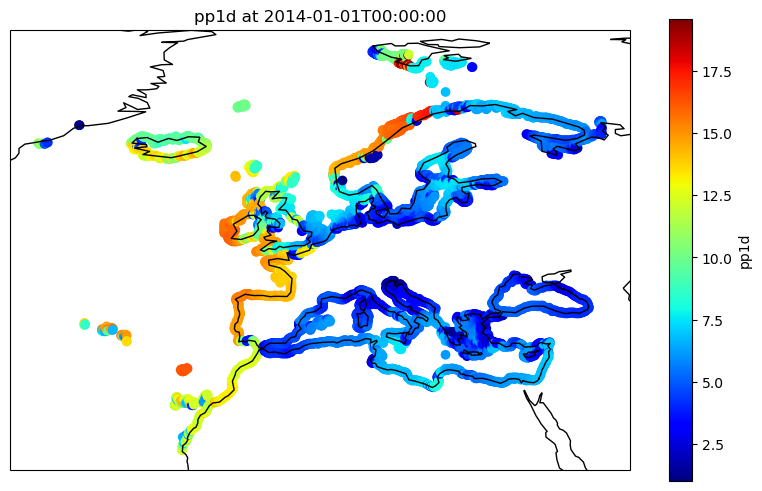

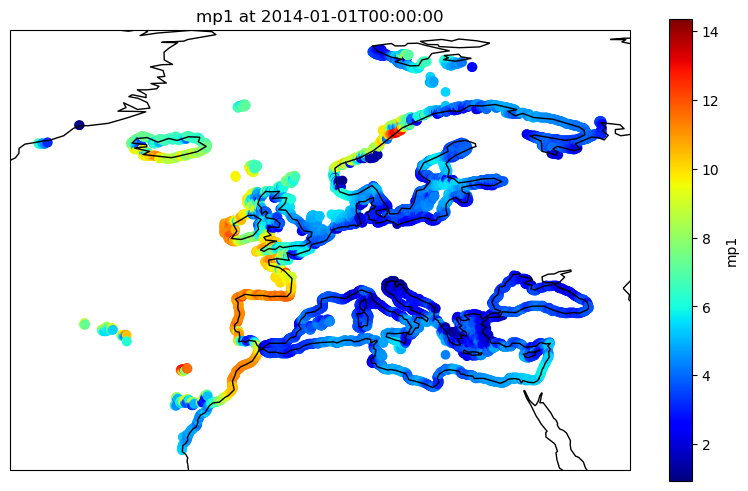

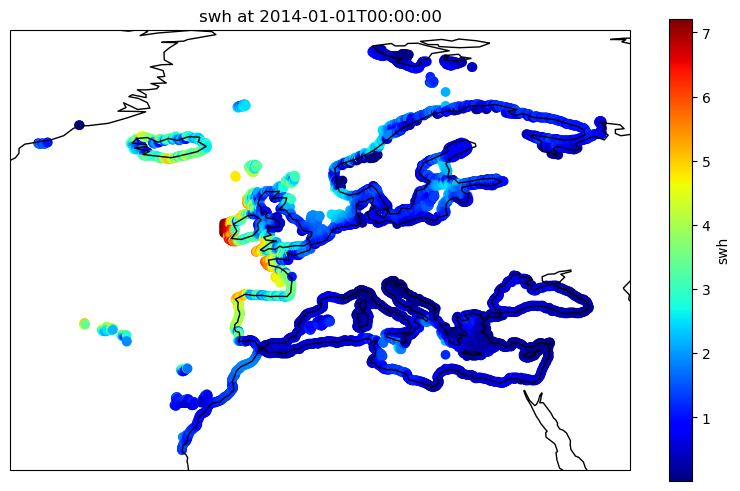

In [4]:
specific_time = '2014-01-01T00:00:00'  # Example: January 1st, 2014, 12:00 PM
# List out the names of the datasets
dataset_names = [name for name in globals() if name.endswith('_dataset')]

for dataset_name in dataset_names:
    # Check if the dataset name exists in globals
    dataset = globals().get(dataset_name)
    
    # Extract variable name from the dataset name
    variable = dataset_name.split('_')[0]

    # Call the plot_variable_at_time function
    if dataset:
        plot_variable_at_time(dataset, variable, specific_time)
    else:
        print(f"Dataset {dataset_name} not found in globals.")

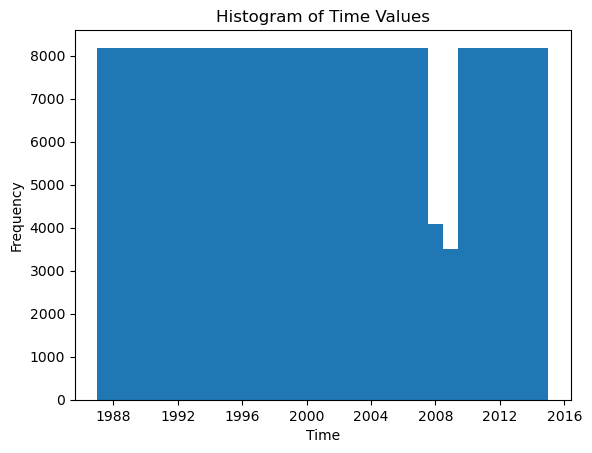

In [5]:
# Extract time values from the filtered dataset
time_values = mwd_dataset['time'].values

# Plot histogram of time values
plt.hist(time_values, bins=30)  # Adjust the number of bins as needed
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram of Time Values')
plt.show()